In [ ]:
import pandas as pd
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 마이너스 기호 깨질때
plt.rcParams['font.family'] ='Malgun Gothic' # 그래프 한글깨질때

In [ ]:
job = pd.read_csv('서울시 상권분석서비스(직장인구-행정동).csv',encoding='cp949')
job.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,11110600,가회동,22078,18464,3614,36,2844,8418,5997,...,7075,5310,3712,583,19,1077,1343,687,337,151
1,20191,11110560,평창동,2458,1110,1348,6,340,515,525,...,235,261,239,266,2,235,280,264,344,223
2,20191,11110650,혜화동,5330,2736,2594,20,907,1322,1338,...,591,716,657,421,12,564,731,622,458,207
3,20191,11140650,신당5동,2047,908,1139,6,288,511,484,...,238,228,192,143,3,184,273,256,276,147
4,20191,11170660,이태원2동,2658,1434,1224,15,485,679,481,...,378,257,224,341,5,261,301,224,201,232


In [ ]:
job.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_직장_인구_수', '남성_직장_인구_수',
       '여성_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수',
       '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수',
       '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수',
       '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수',
       '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수',
       '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [ ]:
job.columns = ['기준년분기코드', '행정동코드', '행정동명', '총직장인구수', '남성직장인구수',
       '여성직장인구_수', '10대직장인구수', '20대직장인구수', '30대직장인구수',
       '40대직장인구수', '50대직장인구수', '60대이상직장인구수',
       '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수',
       '남성40대직장인구수', '남성50대직장인구수', '남성60대이상직장인구수',
       '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']

In [ ]:
job.head()

,기준년분기코드,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,40대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,20191,11110600,가회동,22078,18464,3614,36,2844,8418,5997,...,7075,5310,3712,583,19,1077,1343,687,337,151
1,20191,11110560,평창동,2458,1110,1348,6,340,515,525,...,235,261,239,266,2,235,280,264,344,223
2,20191,11110650,혜화동,5330,2736,2594,20,907,1322,1338,...,591,716,657,421,12,564,731,622,458,207
3,20191,11140650,신당5동,2047,908,1139,6,288,511,484,...,238,228,192,143,3,184,273,256,276,147
4,20191,11170660,이태원2동,2658,1434,1224,15,485,679,481,...,378,257,224,341,5,261,301,224,201,232


In [ ]:
job['기준년분기코드'] = job['기준년분기코드'].astype(str)
job['년도'] = job['기준년분기코드'].apply(lambda x: x[:4])
job['분기'] = job['기준년분기코드'].apply(lambda x: x[4])
job.head()

,기준년분기코드,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,40대직장인구수,...,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수,년도,분기
0,20191,11110600,가회동,22078,18464,3614,36,2844,8418,5997,...,3712,583,19,1077,1343,687,337,151,2019,1
1,20191,11110560,평창동,2458,1110,1348,6,340,515,525,...,239,266,2,235,280,264,344,223,2019,1
2,20191,11110650,혜화동,5330,2736,2594,20,907,1322,1338,...,657,421,12,564,731,622,458,207,2019,1
3,20191,11140650,신당5동,2047,908,1139,6,288,511,484,...,192,143,3,184,273,256,276,147,2019,1
4,20191,11170660,이태원2동,2658,1434,1224,15,485,679,481,...,224,341,5,261,301,224,201,232,2019,1


In [ ]:
job.to_csv('job.csv',index=False)

### 지하철 역명 붙이기

In [ ]:
juso = pd.read_csv('C:/Users/tjoeun/Desktop/지하철_개인/지하철/지하철역명_최종.csv')
juso.head()

,호선,역명,위도,경도,행정동코드,행정동_카카오,역명2,구
0,1,서울역,37.553150,126.972533,11140540,회현동,1호선 서울역,중구
1,1,시청역,37.563590,126.975407,11020520,소공동,1호선 시청역,중구
2,1,종각역,37.570203,126.983116,11110615,"종로1,2,3,4가동",1호선 종각역,종로구
3,1,종로3가역,37.570429,126.992095,11110615,"종로1,2,3,4가동",1호선 종로3가역,종로구
4,1,종로5가역,37.570971,127.001900,11110615,"종로1,2,3,4가동",1호선 종로5가역,종로구


In [ ]:
juso2 = juso[['역명2','구','행정동코드','행정동_카카오','위도','경도']]

In [ ]:
juso2.head()

,역명2,구,행정동코드,행정동_카카오,위도,경도
0,1호선 서울역,중구,11140540,회현동,37.553150,126.972533
1,1호선 시청역,중구,11020520,소공동,37.563590,126.975407
2,1호선 종각역,종로구,11110615,"종로1,2,3,4가동",37.570203,126.983116
3,1호선 종로3가역,종로구,11110615,"종로1,2,3,4가동",37.570429,126.992095
4,1호선 종로5가역,종로구,11110615,"종로1,2,3,4가동",37.570971,127.001900


In [ ]:
job.head()

,년도,분기,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,2019,1,11110600,가회동,22078,18464,3614,36,2844,8418,...,7075,5310,3712,583,19,1077,1343,687,337,151
1,2019,1,11110560,평창동,2458,1110,1348,6,340,515,...,235,261,239,266,2,235,280,264,344,223
2,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,591,716,657,421,12,564,731,622,458,207
3,2019,1,11140650,신당5동,2047,908,1139,6,288,511,...,238,228,192,143,3,184,273,256,276,147
4,2019,1,11170660,이태원2동,2658,1434,1224,15,485,679,...,378,257,224,341,5,261,301,224,201,232


In [ ]:
job_train = pd.merge(job,juso2,on='행정동코드',how = 'left')
job_train.head()

,년도,분기,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,...,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수,역명2,구,행정동_카카오,위도,경도
0,2019,1,11110600,가회동,22078,18464,3614,36,2844,8418,...,1077,1343,687,337,151,NaN,NaN,NaN,NaN,NaN
1,2019,1,11110560,평창동,2458,1110,1348,6,340,515,...,235,280,264,344,223,6호선 화랑대역,노원구,공릉2동,37.619875,127.084106
2,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,4호선 혜화역,종로구,혜화동,37.582116,127.001759
3,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,7호선 수락산역,노원구,상계1동,37.677804,127.055314
4,2019,1,11140650,신당5동,2047,908,1139,6,288,511,...,184,273,256,276,147,NaN,NaN,NaN,NaN,NaN


In [ ]:
job_grouped = job.groupby(['년도','분기','구','역명2'])[['총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']].mean().round(0).astype(int).reset_index()

In [ ]:
job_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9467 entries, 0 to 9466
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   년도            9467 non-null   object 
 1   분기            9467 non-null   object 
 2   행정동코드         9467 non-null   int64  
 3   행정동명          9467 non-null   object 
 4   총직장인구수        9467 non-null   int64  
 5   남성직장인구수       9467 non-null   int64  
 6   여성직장인구_수      9467 non-null   int64  
 7   10대직장인구수      9467 non-null   int64  
 8   20대직장인구수      9467 non-null   int64  
 9   30대직장인구수      9467 non-null   int64  
 10  40대직장인구수      9467 non-null   int64  
 11  50대직장인구수      9467 non-null   int64  
 12  60대이상직장인구수    9467 non-null   int64  
 13  남성10대직장인구수    9467 non-null   int64  
 14  남성20대직장인구수    9467 non-null   int64  
 15  남성30대직장인구수    9467 non-null   int64  
 16  남성40대직장인구수    9467 non-null   int64  
 17  남성50대직장인구수    9467 non-null   int64  
 18  남성60대이상직장인구수  9467 non-null 

In [ ]:
job_train.to_csv('job_train.csv',index=False)

### 수기로 추가할 수 있는 지하철역 추가

In [ ]:
job = pd.read_csv('job_train2.csv')
job.head()

,년도,분기,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,...,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수,역명2,구,행정동_카카오,위도,경도
0,2019,1,11110600,가회동,22078,18464,3614,36,2844,8418,...,1077,1343,687,337,151,3호선 안국역,종로구,"종로1,2,3,4가동",37.576562,126.985470
1,2019,1,11110560,평창동,2458,1110,1348,6,340,515,...,235,280,264,344,223,6호선 화랑대역,노원구,공릉2동,37.619875,127.084106
2,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,4호선 혜화역,종로구,혜화동,37.582116,127.001759
3,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,7호선 수락산역,노원구,상계1동,37.677804,127.055314
4,2019,1,11140650,신당5동,2047,908,1139,6,288,511,...,184,273,256,276,147,2호선 신당역,중구,신당동,37.565681,127.019488


In [ ]:
job.columns

Index(['년도', '분기', '행정동코드', '행정동명', '총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수', '역명2', '구', '행정동_카카오', '위도',
       '경도'],
      dtype='object')

## 구 별로 직장인구수 그룹화

In [ ]:
job_grouped = job.groupby(['구'])[['총직장인구수']].mean().round(0).astype(int).reset_index()
job_grouped_m = job.groupby(['구'])[['남성직장인구수']].mean().round(0).astype(int).reset_index()
job_grouped_f = job.groupby(['구'])[['여성직장인구_수']].mean().round(0).astype(int).reset_index()

In [ ]:
job_grouped.to_csv('job_grouped.csv',index=False)

In [ ]:
job_grouped2 = job.groupby(['구','역명2'])[['총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']].mean().reset_index()
job_grouped2

,구,역명2,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,40대직장인구수,50대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,강남구,2호선 강남역,173278.789474,102156.736842,71122.052632,503.000000,34690.578947,52884.473684,44396.000000,30113.315789,...,32965.947368,29048.052632,16246.105263,7233.684211,309.947368,18220.684211,19918.526316,15347.947368,13867.210526,3457.736842
1,강남구,2호선 삼성역,128108.736842,86016.473684,42092.263158,301.315789,25746.315789,38996.105263,33958.736842,22213.736842,...,25715.736842,25080.578947,17275.052632,4178.631579,154.000000,12127.157895,13280.368421,8878.157895,4938.684211,2713.894737
2,강남구,2호선 선릉역,60668.631579,34341.684211,26326.947368,152.000000,12636.315789,19479.052632,15092.473684,8614.000000,...,11385.105263,9898.368421,4737.842105,3070.842105,89.578947,7449.210526,8093.947368,5194.105263,3876.157895,1623.947368
3,강남구,2호선 역삼역,52448.947368,31053.052632,21395.894737,211.210526,11822.578947,14834.315789,12653.631579,9138.000000,...,9413.105263,8470.263158,4848.052632,2622.000000,124.631579,6209.526316,5421.210526,4183.368421,4289.947368,1167.210526
4,강남구,3호선 대청역,4378.578947,2760.973684,1617.605263,12.394737,668.236842,1053.131579,1128.368421,987.631579,...,653.105263,732.000000,665.026316,353.684211,7.210526,316.263158,400.026316,396.368421,322.605263,175.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,중랑구,7호선 먹골역,2378.289474,1328.578947,1049.710526,2.789474,298.631579,560.342105,625.631579,604.026316,...,314.526316,333.921053,347.236842,194.421053,1.657895,161.289474,245.815789,291.710526,256.789474,92.447368
275,중랑구,7호선 면목역,1931.308333,1153.716667,777.591667,3.141667,203.491667,352.966667,473.650000,525.166667,...,185.308333,262.866667,343.633333,281.058333,1.625000,124.158333,167.658333,210.783333,181.533333,91.833333
276,중랑구,7호선 상봉역,4099.750000,2753.375000,1346.375000,13.812500,497.187500,927.500000,1157.187500,983.937500,...,618.187500,736.437500,683.750000,423.937500,3.625000,216.312500,309.312500,420.750000,300.187500,96.187500
277,중랑구,7호선 중화역,1766.789474,950.684211,816.105263,4.394737,206.342105,331.263158,447.631579,411.342105,...,143.789474,219.973684,225.894737,270.657895,1.131579,119.236842,187.473684,227.657895,185.447368,95.157895


In [ ]:
job_grouped2.sort_values(by=['총직장인구수'],ascending=False)[:10]

,구,역명2,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,40대직장인구수,50대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
207,영등포구,5호선 여의도역,219990.789474,154415.526316,65575.263158,510.315789,39866.368421,78914.000000,57066.052632,33653.368421,...,55808.052632,43607.368421,26562.368421,6705.157895,326.000000,18318.105263,23105.947368,13458.684211,7091.000000,3275.526316
206,영등포구,5호선 여의나루역,216133.777778,152391.777778,63742.000000,501.000000,39325.888889,77439.777778,55799.000000,33168.555556,...,55046.444444,42794.666667,26237.444444,6690.666667,316.000000,17888.333333,22393.333333,13004.333333,6931.111111,3208.888889
6,강남구,3호선 도곡역,184902.578947,125919.526316,58983.052632,836.263158,35178.947368,72417.263158,53111.210526,19421.263158,...,49502.473684,40613.894737,13988.526316,2582.789474,317.894737,16465.473684,22914.789474,12497.315789,5432.736842,1354.842105
0,강남구,2호선 강남역,173278.789474,102156.736842,71122.052632,503.000000,34690.578947,52884.473684,44396.000000,30113.315789,...,32965.947368,29048.052632,16246.105263,7233.684211,309.947368,18220.684211,19918.526316,15347.947368,13867.210526,3457.736842
1,강남구,2호선 삼성역,128108.736842,86016.473684,42092.263158,301.315789,25746.315789,38996.105263,33958.736842,22213.736842,...,25715.736842,25080.578947,17275.052632,4178.631579,154.000000,12127.157895,13280.368421,8878.157895,4938.684211,2713.894737
7,강남구,3호선 매봉역,113311.552632,77779.210526,35532.342105,469.236842,21150.052632,41075.947368,32404.631579,14989.605263,...,27953.210526,24697.473684,11323.789474,2306.921053,173.631579,9947.842105,13122.736842,7707.157895,3665.815789,915.157895
239,종로구,1호선 종각역,99117.421053,55457.210526,43660.210526,1406.631579,19964.894737,30053.315789,27017.052632,15712.105263,...,15355.052632,16212.157895,11186.894737,3377.947368,794.473684,11251.894737,14698.263158,10804.894737,4525.210526,1585.473684
240,종로구,1호선 종로3가역,99117.421053,55457.210526,43660.210526,1406.631579,19964.894737,30053.315789,27017.052632,15712.105263,...,15355.052632,16212.157895,11186.894737,3377.947368,794.473684,11251.894737,14698.263158,10804.894737,4525.210526,1585.473684
241,종로구,1호선 종로5가역,99117.421053,55457.210526,43660.210526,1406.631579,19964.894737,30053.315789,27017.052632,15712.105263,...,15355.052632,16212.157895,11186.894737,3377.947368,794.473684,11251.894737,14698.263158,10804.894737,4525.210526,1585.473684
249,종로구,5호선 종로3가역,99117.421053,55457.210526,43660.210526,1406.631579,19964.894737,30053.315789,27017.052632,15712.105263,...,15355.052632,16212.157895,11186.894737,3377.947368,794.473684,11251.894737,14698.263158,10804.894737,4525.210526,1585.473684


In [ ]:
job_grouped3 = job.groupby('구')[['총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']].mean()
job_grouped3.sort_values(by=['총직장인구수'],ascending=False)

,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,40대직장인구수,50대직장인구수,60대이상직장인구수,남성10대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
구,,,,,,,,,,,,,,,,,,,,,
강남구,57781.922197,36042.743707,21739.178490,219.107551,11435.881007,18671.782609,15049.830664,8833.482838,3571.837529,105.299771,...,11822.647597,10572.123570,5815.260870,2364.750572,113.807780,6073.219680,6849.135011,4477.707094,3018.221968,1207.086957
종로구,37535.349030,21365.894737,16169.454294,474.113573,7240.060942,11260.587258,10264.573407,6171.329640,2124.684211,202.722992,...,5926.808864,6294.110803,4370.484765,1430.825485,271.390582,4099.119114,5333.778393,3970.462604,1800.844875,693.858726
서초구,34579.216931,22190.343915,12388.873016,106.402116,6026.343915,9657.074074,8765.476190,7354.240741,2669.679894,49.092593,...,6009.629630,5985.216931,5469.828042,1918.428571,57.309524,3268.195767,3647.444444,2780.259259,1884.412698,751.251323
영등포구,29044.793765,19737.525180,9307.268585,72.405276,5093.076739,9599.561151,7573.239808,4771.964029,1934.546763,27.558753,...,6661.414868,5607.697842,3478.513189,1312.304556,44.846523,2443.040767,2938.146283,1965.541966,1293.450839,622.242206
중구,20860.962963,11362.354776,9498.608187,101.713450,4611.192982,6228.128655,5120.758285,3393.374269,1405.795322,36.364522,...,3356.906433,3136.116959,2155.520468,888.851852,65.348928,2822.598441,2871.222222,1984.641326,1237.853801,516.943470
금천구,19984.397129,12885.511962,7098.885167,81.889952,3651.947368,5678.866029,4799.956938,3254.488038,2517.248804,49.765550,...,3757.435407,3327.813397,2067.794258,1757.454545,32.124402,1726.698565,1921.430622,1472.143541,1186.693780,759.794258
용산구,18361.760870,9903.341615,8458.419255,77.052795,3875.279503,5575.698758,4901.040373,2915.605590,1017.083851,34.692547,...,2886.503106,2813.239130,1961.621118,710.018634,42.360248,2378.012422,2689.195652,2087.801242,953.984472,307.065217
송파구,14362.635870,9207.231884,5155.403986,34.005435,2020.567029,3497.400362,3732.791667,3379.414855,1698.456522,16.827899,...,2244.661232,2520.505435,2195.182971,1184.300725,17.177536,974.813406,1252.739130,1212.286232,1184.231884,514.155797
동대문구,10563.683099,5930.524648,4633.158451,29.098592,1675.630282,2842.538732,2682.672535,2129.869718,1203.873239,13.109155,...,1640.098592,1546.137324,1204.971831,749.799296,15.989437,899.221831,1202.440141,1136.535211,924.897887,454.073944


# 구 별 직장인구수 지도 그리기

In [ ]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [ ]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = job_grouped,
    columns = ['구','총직장인구수'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [ ]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = job_grouped_m,
    columns = ['구','남성직장인구수'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [ ]:
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data = job_grouped_f,
    columns = ['구','여성직장인구_수'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)
m

In [ ]:
job_group_s = job.groupby('역명2')[['총직장인구수','남성직장인구수','여성직장인구_수']].mean().round(0).astype(int).reset_index()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7544\3607251539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총직장인구수',y='역명2',data=job_group_st,orient='h',palette='autumn')


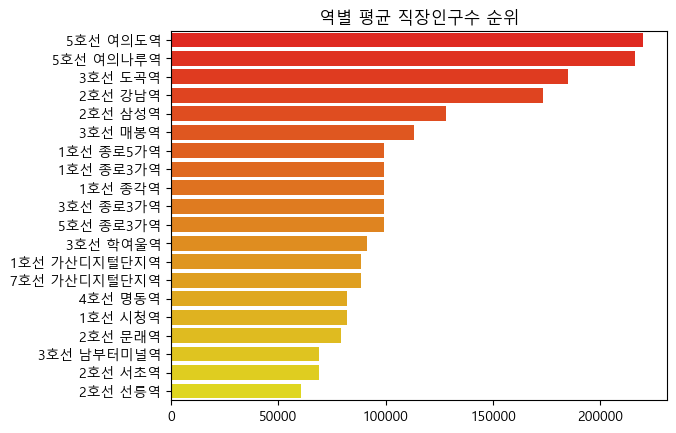

In [ ]:
job_group_st = job_group_s.sort_values(by=['총직장인구수'],ascending=False)[:20]
ax = sns.barplot(x='총직장인구수',y='역명2',data=job_group_st,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("역별 평균 직장인구수 순위");

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7544\1228847000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='총직장인구수',y='구',data=job_gu2,orient='h',palette='autumn')


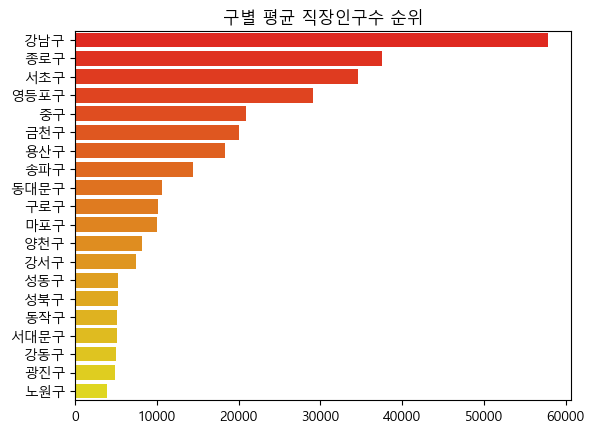

In [ ]:
job_gu = job.groupby('구')[['총직장인구수','남성직장인구수','여성직장인구_수']].mean().round(0).astype(int).reset_index()
job_gu2 = job_gu.sort_values(by=['총직장인구수'],ascending=False)[:20]
ax = sns.barplot(x='총직장인구수',y='구',data=job_gu2,orient='h',palette='autumn')
ax.set(xlabel='',ylabel='')
ax.set_title("구별 평균 직장인구수 순위");
